### Load Image and Plot

In [17]:
from PIL import Image
import glob 
import matplotlib.pyplot as plt

In [18]:
img1 = Image.open('../data/camseq2007/0016E5_07959.png')
label1 = Image.open('../data/camseq2007/0016E5_07959_L.png')

(-0.5, 959.5, 719.5, -0.5)

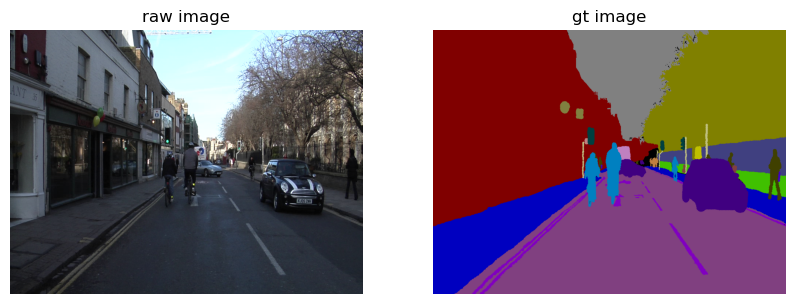

In [19]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10)) #행, 열
ax1.imshow(img1)
ax1.set_title('raw image')

ax2.imshow(label1)
ax2.set_title('gt image')

ax1.axis(False)
ax2.axis(False)

### Practice Dataset

In [20]:
import numpy as np
import torch

In [21]:
img_numpy = np.array(img1) #넘파이 형태로 바꾸기, 값을 사용해야해서
label_numpy = np.array(label1)

In [22]:
img_numpy #픽셀값이 찍힌다.

array([[[ 37,  37,  37],
        [ 37,  37,  37],
        [ 34,  38,  39],
        ...,
        [ 85,  90,  99],
        [134, 134, 145],
        [139, 139, 150]],

       [[ 37,  37,  39],
        [ 37,  37,  39],
        [ 34,  38,  39],
        ...,
        [103, 107, 119],
        [173, 176, 182],
        [139, 142, 148]],

       [[ 37,  37,  41],
        [ 37,  37,  41],
        [ 34,  38,  41],
        ...,
        [108, 114, 132],
        [163, 169, 167],
        [110, 116, 114]],

       ...,

       [[ 23,  23,  27],
        [ 24,  24,  28],
        [ 24,  24,  28],
        ...,
        [ 35,  43,  51],
        [ 34,  42,  50],
        [ 35,  43,  51]],

       [[ 23,  24,  28],
        [ 23,  24,  28],
        [ 24,  25,  29],
        ...,
        [ 37,  45,  53],
        [ 35,  43,  51],
        [ 35,  43,  51]],

       [[ 23,  24,  28],
        [ 23,  24,  28],
        [ 23,  24,  28],
        ...,
        [ 38,  46,  54],
        [ 34,  42,  50],
        [ 34,  42,  50]]

In [23]:
img_numpy.shape, type(img_numpy), label_numpy.shape, type(label_numpy)

((720, 960, 3), numpy.ndarray, (720, 960, 3), numpy.ndarray)

In [24]:
img_torch = torch.from_numpy(img_numpy) #모델은 항상 torch 형태여야 한다.
label_torch = torch.from_numpy(label_numpy)

In [25]:
img_torch.shape, type(img_torch), label_torch.shape, type(label_torch)

(torch.Size([720, 960, 3]),
 torch.Tensor,
 torch.Size([720, 960, 3]),
 torch.Tensor)

In [26]:
files = glob.glob('../data/camseq2007/*L.png')

In [27]:
img_file = files[0][:-6] + '.png'

In [28]:
files[0], img_file

('../data/camseq2007\\0016E5_07959_L.png',
 '../data/camseq2007\\0016E5_07959.png')

In [29]:
from camseq_dataset import CamSeq

In [30]:
dataset = CamSeq()

c:\Users\hjjh2\workspace\machine-learning-study\4.segmentation_practice\data
101


### Make Segmentation Label

In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image as Image

In [2]:
label_paths = glob.glob('../data/camseq2007/*L.png')

In [3]:
label_paths

['../data/camseq2007\\0016E5_07959_L.png',
 '../data/camseq2007\\0016E5_07961_L.png',
 '../data/camseq2007\\0016E5_07963_L.png',
 '../data/camseq2007\\0016E5_07965_L.png',
 '../data/camseq2007\\0016E5_07967_L.png',
 '../data/camseq2007\\0016E5_07969_L.png',
 '../data/camseq2007\\0016E5_07971_L.png',
 '../data/camseq2007\\0016E5_07973_L.png',
 '../data/camseq2007\\0016E5_07975_L.png',
 '../data/camseq2007\\0016E5_07977_L.png',
 '../data/camseq2007\\0016E5_07979_L.png',
 '../data/camseq2007\\0016E5_07981_L.png',
 '../data/camseq2007\\0016E5_07983_L.png',
 '../data/camseq2007\\0016E5_07985_L.png',
 '../data/camseq2007\\0016E5_07987_L.png',
 '../data/camseq2007\\0016E5_07989_L.png',
 '../data/camseq2007\\0016E5_07991_L.png',
 '../data/camseq2007\\0016E5_07993_L.png',
 '../data/camseq2007\\0016E5_07995_L.png',
 '../data/camseq2007\\0016E5_07997_L.png',
 '../data/camseq2007\\0016E5_07999_L.png',
 '../data/camseq2007\\0016E5_08001_L.png',
 '../data/camseq2007\\0016E5_08003_L.png',
 '../data/c

In [4]:
label1 = Image.open(label_paths[0])

In [5]:
label1_np = np.array(label1)

In [6]:
type(label1)

PIL.PngImagePlugin.PngImageFile

In [7]:
label1_np.shape

(720, 960, 3)

In [8]:
label1_np[0][0] #3개의 RGB값이 출력

array([128,   0,   0], dtype=uint8)

In [9]:
color_map = {
0 : (64, 128, 64),	
1 : (192, 0, 128),	
2 : (0, 128, 192),
3 : (0, 128, 64),	
4 : (128, 0, 0),		
5 : (64, 0 ,128),	
6 : (64, 0, 192), 
7 : (192, 128, 64),	
8 :(192, 192, 128),	
9 :(64 ,64 ,128),	
10 : (128, 0, 192),	
11 :(192, 0, 64),	
12 :(128, 128, 64),	
13 :(192, 0, 192),	
14 : (128, 64, 64),	
15 : (64, 192, 128),	
16 :(64, 64, 0),	
17 : (128, 64, 128),	
18 :(128, 128, 192),	
19 : (0, 0, 192),		
20 : (192, 128, 128),	
21 : (128, 128, 128),	
22 : (64, 128, 192),	
23 : (0, 0, 64),		
24 : (0, 64, 64),		
25 : (192, 64, 128),	
26 : (128, 128, 0),	
27 : (192, 128, 192),	
28 : (64, 0, 64),		
29 : (192, 192, 0),	
30 : (64, 192, 0),	
50 : (0, 0, 0),		

}

In [42]:
#key, value
#color_map[0] #딕셔너리를 사용하면 편~하다잉

result = np.zeros((label1_np.shape[0], label1_np.shape[1], 1))
#! 이미지의 
result[0][0] = 4

In [43]:
result.shape

(720, 960, 1)

In [47]:
for i in range (label1_np.shape[0]):
    for j in range (label1_np.shape[1]):
        pixel = label1_np[i][j] #[128,0,0]
        for k, v in color_map.items():
            if tuple(pixel) == v:
                result[i][j] = k
#문제가 있다!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [10]:
def encode_lable(decode_label, color_map): #decode_label : 3 channel RGB label
    result = np.zeros((decode_label.shape[0], decode_label.shape[1]),dtype=np.int8)
    for k,v in color_map.items():
        tt = np.equal(decode_label[:,:,:3], list(v)).sum(axis=-1)
        result[tt == 3] = k
    return result
#벡터화 시켰다 python vectorization 검색 ㄱ

In [11]:
tt = np.equal(label1_np[..., :3], list((128, 0,0))).sum(axis=-1)

In [12]:
result = encode_lable(label1_np, color_map=color_map)

In [13]:
result[0][0], label1_np[0][0]

(4, array([128,   0,   0], dtype=uint8))

In [14]:
def decode_label(encode_lable, color_map):
    r = np.zeros((encode_lable.shape[0], encode_lable.shape[1],1),dtype=np.uint8)
    g = np.zeros((encode_lable.shape[0], encode_lable.shape[1],1),dtype=np.uint8)
    b = np.zeros((encode_lable.shape[0], encode_lable.shape[1],1),dtype=np.uint8)
    for k,v in color_map.items(): # k = 4 v = (128,0,0)
        r[encode_lable == k] = v[0]
        g[encode_lable == k] = v[1]
        b[encode_lable == k] = v[2]
    rgb = np.concatenate((r,g,b), axis=2)
    return rgb

In [15]:
decode_rgb = decode_label(result, color_map)

In [18]:
decode_rgb.shape

(720, 960, 3)

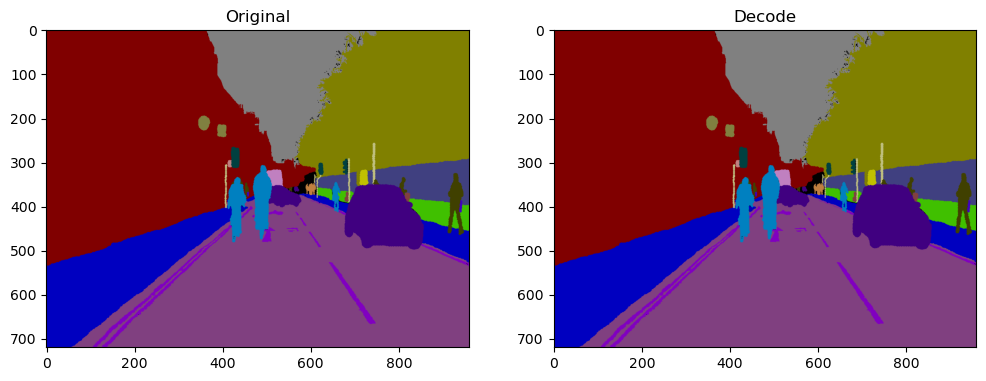

In [19]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,12))

ax1.imshow(label1_np)
ax1.set_title('Original')

ax2.imshow(decode_rgb)
ax2.set_title('Decode')

plt.show()

In [20]:
np.unique(label1_np == decode_rgb)

array([ True])

In [21]:
result_png = Image.fromarray(result)

In [23]:
type(result_png)

PIL.Image.Image

In [24]:
result_png.save('result.png')

In [25]:
load_png = Image.open('result.png')

In [26]:
load_png_np = np.array(load_png)

In [27]:
np.unique(load_png_np == result)

array([ True])

In [28]:
load_png_np

array([[ 4,  4,  4, ..., 26, 26, 26],
       [ 4,  4,  4, ..., 26, 26, 26],
       [ 4,  4,  4, ..., 26, 26, 26],
       ...,
       [19, 19, 19, ..., 17, 17, 17],
       [19, 19, 19, ..., 17, 17, 17],
       [19, 19, 19, ..., 17, 17, 17]])

In [37]:
for path in label_paths:
    label_img = Image.open(path) #rgb target open
    label_np = np.array(label_img) #rgb -> numpy
    result = encode_lable(label_np, color_map) #rgn numpy -> segmenation target
    result_img = Image.fromarray(result) #segmentation target to image
    save_path = path[:-5] + 'label.png' #path
    result_img.save(save_path) #save image file

In [32]:
save_path = label_paths[0]

In [34]:
save_path = save_path[:-5] + 'label.png'

In [35]:
save_path

'../data/camseq2007\\0016E5_07959_label.png'